# 1. Set up Mario

In [1]:
# Import Super mario package
import gym_super_mario_bros
# Import the joypad wrapper
from nes_py.wrappers import JoypadSpace
# Import the Simplified control
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [2]:
# Check the movements
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [3]:
# Set up the game
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [4]:
# Create a flag - restart or not
done = True
for step in range(1):
    if done:
        # Start the game to begin with
        env.reset()
    # Take random actions
    state, reward, done, info = env.step(env.action_space.sample())
    # Show the game screen
    env.render()
# Close the game
env.close()

# 2. Preprocess enviroments

In [5]:
# Import Frame Stacker Wrappers and GrayScaling Wrappers
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# Import Matplotlib
from matplotlib import pyplot as plt

In [6]:
# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# 2. Simplyfy the controls
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. GrayScale
env = GrayScaleObservation(env, keep_dim=True)
# 4. Wrap inside the dummy enviroment
env = DummyVecEnv([lambda: env])
# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last')

In [7]:
state = env.reset()

In [8]:
state, reward, done, info = env.step([5])

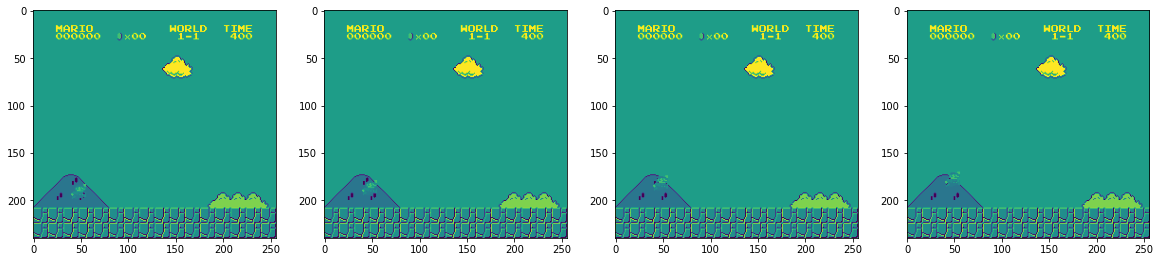

In [23]:
plt.figure(figsize=(20,16))
for indx in range(state.shape[3]):
    plt.subplot(1, 4, indx+1)
    plt.imshow(state[0][:,:,indx])
plt.show()

# 3. Train the RL Algorithm

In [9]:
# Import os for path file enviroment
import os
# Import PPO model
from stable_baselines3 import PPO
# Import Base Callbacks for saving models
from stable_baselines3.common.callbacks import BaseCallback

In [10]:
class TrainAndLoggingCallback(BaseCallback):
    
    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path
    
    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)
    
    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model{}'.format(self.n_calls))
            
        return True


In [11]:
CHECK_POINT_DIR = './train/'
LOG_DIR = './logs/'

In [12]:
callback = TrainAndLoggingCallback(check_freq=100000, save_path=CHECK_POINT_DIR)

In [13]:
# This is the AI model started
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, n_steps=512)

Using cuda device
Wrapping the env in a VecTransposeImage.


In [14]:
# Train the AI model
model.learn(total_timesteps=1000000, callback=callback)

Logging to ./logs/PPO_2


/home/uriel/.local/lib/python3.8/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


----------------------------
| time/              |     |
|    fps             | 75  |
|    iterations      | 1   |
|    time_elapsed    | 6   |
|    total_timesteps | 512 |
----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 2             |
|    time_elapsed         | 17            |
|    total_timesteps      | 1024          |
| train/                  |               |
|    approx_kl            | 4.1302876e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | 0.00191       |
|    learning_rate        | 1e-06         |
|    loss                 | 123           |
|    n_updates            | 10            |
|    policy_gradient_loss | -0.000383     |
|    value_loss           | 387           |
-------------------------------------------
-----

------------------------------------------
| time/                   |              |
|    fps                  | 47           |
|    iterations           | 13           |
|    time_elapsed         | 140          |
|    total_timesteps      | 6656         |
| train/                  |              |
|    approx_kl            | 3.856374e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.95        |
|    explained_variance   | 0.134        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.306        |
|    n_updates            | 120          |
|    policy_gradient_loss | -8.9e-05     |
|    value_loss           | 0.436        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 14            |
|    time_elapsed         | 152           |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 24            |
|    time_elapsed         | 263           |
|    total_timesteps      | 12288         |
| train/                  |               |
|    approx_kl            | 2.7551665e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.94         |
|    explained_variance   | 0.0439        |
|    learning_rate        | 1e-06         |
|    loss                 | 35            |
|    n_updates            | 230           |
|    policy_gradient_loss | -0.000516     |
|    value_loss           | 68.2          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 25            |
|    time_elapsed         | 274 

------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 35           |
|    time_elapsed         | 386          |
|    total_timesteps      | 17920        |
| train/                  |              |
|    approx_kl            | 3.639504e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.94        |
|    explained_variance   | -0.0296      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.232        |
|    n_updates            | 340          |
|    policy_gradient_loss | -0.000131    |
|    value_loss           | 2.2          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 36            |
|    time_elapsed         | 398           |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 46            |
|    time_elapsed         | 510           |
|    total_timesteps      | 23552         |
| train/                  |               |
|    approx_kl            | 1.0472606e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.94         |
|    explained_variance   | 0.0106        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0725        |
|    n_updates            | 450           |
|    policy_gradient_loss | -9.04e-05     |
|    value_loss           | 0.141         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 47           |
|    time_elapsed         | 521     

-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 57            |
|    time_elapsed         | 632           |
|    total_timesteps      | 29184         |
| train/                  |               |
|    approx_kl            | 1.5246449e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.94         |
|    explained_variance   | 0.223         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.148         |
|    n_updates            | 560           |
|    policy_gradient_loss | -0.00013      |
|    value_loss           | 0.403         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 58            |
|    time_elapsed         | 643 

-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 68            |
|    time_elapsed         | 754           |
|    total_timesteps      | 34816         |
| train/                  |               |
|    approx_kl            | 1.3149693e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.93         |
|    explained_variance   | 0.156         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0747        |
|    n_updates            | 670           |
|    policy_gradient_loss | -4.1e-05      |
|    value_loss           | 0.599         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 69           |
|    time_elapsed         | 765     

-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 79            |
|    time_elapsed         | 876           |
|    total_timesteps      | 40448         |
| train/                  |               |
|    approx_kl            | 3.5951147e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.93         |
|    explained_variance   | -0.0602       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.086         |
|    n_updates            | 780           |
|    policy_gradient_loss | -0.000275     |
|    value_loss           | 0.278         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 80            |
|    time_elapsed         | 887 

-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 90            |
|    time_elapsed         | 999           |
|    total_timesteps      | 46080         |
| train/                  |               |
|    approx_kl            | 7.7513396e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.92         |
|    explained_variance   | 0.0926        |
|    learning_rate        | 1e-06         |
|    loss                 | 24.1          |
|    n_updates            | 890           |
|    policy_gradient_loss | -0.00035      |
|    value_loss           | 98.5          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 91            |
|    time_elapsed         | 1010

-----------------------------------------
| time/                   |             |
|    fps                  | 46          |
|    iterations           | 101         |
|    time_elapsed         | 1121        |
|    total_timesteps      | 51712       |
| train/                  |             |
|    approx_kl            | 5.16047e-05 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.91       |
|    explained_variance   | -0.0486     |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0482      |
|    n_updates            | 1000        |
|    policy_gradient_loss | -0.000152   |
|    value_loss           | 0.444       |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 102          |
|    time_elapsed         | 1132         |
|    total_timesteps      | 5

------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 112          |
|    time_elapsed         | 1244         |
|    total_timesteps      | 57344        |
| train/                  |              |
|    approx_kl            | 0.0010638855 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.9         |
|    explained_variance   | 0.189        |
|    learning_rate        | 1e-06        |
|    loss                 | 195          |
|    n_updates            | 1110         |
|    policy_gradient_loss | -0.000626    |
|    value_loss           | 457          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 113           |
|    time_elapsed         | 1255          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 123           |
|    time_elapsed         | 1367          |
|    total_timesteps      | 62976         |
| train/                  |               |
|    approx_kl            | 5.2965595e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.9          |
|    explained_variance   | -0.0185       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0822        |
|    n_updates            | 1220          |
|    policy_gradient_loss | -0.000226     |
|    value_loss           | 0.474         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 124           |
|    time_elapsed         | 1378

-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 134           |
|    time_elapsed         | 1489          |
|    total_timesteps      | 68608         |
| train/                  |               |
|    approx_kl            | 4.9965223e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.89         |
|    explained_variance   | -0.0341       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0751        |
|    n_updates            | 1330          |
|    policy_gradient_loss | -0.000281     |
|    value_loss           | 1.54          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 135           |
|    time_elapsed         | 1500

------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 145          |
|    time_elapsed         | 1611         |
|    total_timesteps      | 74240        |
| train/                  |              |
|    approx_kl            | 7.734075e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.9         |
|    explained_variance   | 0.0494       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.118        |
|    n_updates            | 1440         |
|    policy_gradient_loss | -0.00014     |
|    value_loss           | 0.814        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 146          |
|    time_elapsed         | 1622         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 156          |
|    time_elapsed         | 1733         |
|    total_timesteps      | 79872        |
| train/                  |              |
|    approx_kl            | 8.077314e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.9         |
|    explained_variance   | 0.339        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.106        |
|    n_updates            | 1550         |
|    policy_gradient_loss | -0.000662    |
|    value_loss           | 0.205        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 157           |
|    time_elapsed         | 1744          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 167          |
|    time_elapsed         | 1856         |
|    total_timesteps      | 85504        |
| train/                  |              |
|    approx_kl            | 7.457647e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.87        |
|    explained_variance   | 0.0225       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0938       |
|    n_updates            | 1660         |
|    policy_gradient_loss | 0.000252     |
|    value_loss           | 2.11         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 168           |
|    time_elapsed         | 1867          |
|    t

--------------------------------------------
| time/                   |                |
|    fps                  | 46             |
|    iterations           | 178            |
|    time_elapsed         | 1979           |
|    total_timesteps      | 91136          |
| train/                  |                |
|    approx_kl            | 0.000109705376 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -1.88          |
|    explained_variance   | -0.0478        |
|    learning_rate        | 1e-06          |
|    loss                 | 0.049          |
|    n_updates            | 1770           |
|    policy_gradient_loss | -0.000414      |
|    value_loss           | 0.127          |
--------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 179          |
|    time_elapsed 

-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 189           |
|    time_elapsed         | 2101          |
|    total_timesteps      | 96768         |
| train/                  |               |
|    approx_kl            | 0.00013070914 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.86         |
|    explained_variance   | 0.0483        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0558        |
|    n_updates            | 1880          |
|    policy_gradient_loss | -0.000562     |
|    value_loss           | 0.267         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 190           |
|    time_elapsed         | 2112

-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 200           |
|    time_elapsed         | 2223          |
|    total_timesteps      | 102400        |
| train/                  |               |
|    approx_kl            | 0.00012968166 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.85         |
|    explained_variance   | 0.178         |
|    learning_rate        | 1e-06         |
|    loss                 | 29.8          |
|    n_updates            | 1990          |
|    policy_gradient_loss | -0.00059      |
|    value_loss           | 80            |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 201           |
|    time_elapsed         | 2234

-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 211           |
|    time_elapsed         | 2346          |
|    total_timesteps      | 108032        |
| train/                  |               |
|    approx_kl            | 0.00011765049 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.8          |
|    explained_variance   | -0.0496       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0481        |
|    n_updates            | 2100          |
|    policy_gradient_loss | -0.000318     |
|    value_loss           | 0.87          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 212           |
|    time_elapsed         | 2357

-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 222           |
|    time_elapsed         | 2469          |
|    total_timesteps      | 113664        |
| train/                  |               |
|    approx_kl            | 0.00011482835 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.79         |
|    explained_variance   | -0.0607       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.117         |
|    n_updates            | 2210          |
|    policy_gradient_loss | -0.000247     |
|    value_loss           | 0.409         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 223           |
|    time_elapsed         | 2481

-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 233           |
|    time_elapsed         | 2592          |
|    total_timesteps      | 119296        |
| train/                  |               |
|    approx_kl            | 0.00012682099 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.76         |
|    explained_variance   | -0.0259       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.216         |
|    n_updates            | 2320          |
|    policy_gradient_loss | -0.000181     |
|    value_loss           | 0.864         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 234          |
|    time_elapsed         | 2603    

-----------------------------------------
| time/                   |             |
|    fps                  | 46          |
|    iterations           | 244         |
|    time_elapsed         | 2715        |
|    total_timesteps      | 124928      |
| train/                  |             |
|    approx_kl            | 0.002494353 |
|    clip_fraction        | 0.0043      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.76       |
|    explained_variance   | 0.454       |
|    learning_rate        | 1e-06       |
|    loss                 | 90.3        |
|    n_updates            | 2430        |
|    policy_gradient_loss | -0.000584   |
|    value_loss           | 275         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 245          |
|    time_elapsed         | 2726         |
|    total_timesteps      | 1

-----------------------------------------
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 255         |
|    time_elapsed         | 2838        |
|    total_timesteps      | 130560      |
| train/                  |             |
|    approx_kl            | 0.000627756 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.73       |
|    explained_variance   | 0.00213     |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0698      |
|    n_updates            | 2540        |
|    policy_gradient_loss | -0.00137    |
|    value_loss           | 1.75        |
-----------------------------------------
--------------------------------------------
| time/                   |                |
|    fps                  | 45             |
|    iterations           | 256            |
|    time_elapsed         | 2849           |
|    total_timestep

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 266           |
|    time_elapsed         | 2961          |
|    total_timesteps      | 136192        |
| train/                  |               |
|    approx_kl            | 0.00033473608 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.7          |
|    explained_variance   | 0.0774        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.141         |
|    n_updates            | 2650          |
|    policy_gradient_loss | -0.000898     |
|    value_loss           | 4.71          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 267           |
|    time_elapsed         | 2972

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 277           |
|    time_elapsed         | 3084          |
|    total_timesteps      | 141824        |
| train/                  |               |
|    approx_kl            | 0.00024987012 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.73         |
|    explained_variance   | -0.0283       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0389        |
|    n_updates            | 2760          |
|    policy_gradient_loss | -0.000479     |
|    value_loss           | 0.136         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 278           |
|    time_elapsed         | 3095

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 288           |
|    time_elapsed         | 3207          |
|    total_timesteps      | 147456        |
| train/                  |               |
|    approx_kl            | 9.1467286e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.71         |
|    explained_variance   | -0.0213       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.108         |
|    n_updates            | 2870          |
|    policy_gradient_loss | 7.11e-05      |
|    value_loss           | 0.694         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 289          |
|    time_elapsed         | 3219    

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 299           |
|    time_elapsed         | 3332          |
|    total_timesteps      | 153088        |
| train/                  |               |
|    approx_kl            | 0.00016091089 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.69         |
|    explained_variance   | -0.168        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.105         |
|    n_updates            | 2980          |
|    policy_gradient_loss | -0.000792     |
|    value_loss           | 0.538         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 300          |
|    time_elapsed         | 3343    

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 310           |
|    time_elapsed         | 3455          |
|    total_timesteps      | 158720        |
| train/                  |               |
|    approx_kl            | 8.6731045e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.69         |
|    explained_variance   | -0.0599       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0446        |
|    n_updates            | 3090          |
|    policy_gradient_loss | -0.000208     |
|    value_loss           | 0.121         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 311          |
|    time_elapsed         | 3466    

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 321           |
|    time_elapsed         | 3578          |
|    total_timesteps      | 164352        |
| train/                  |               |
|    approx_kl            | 0.00011747226 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.66         |
|    explained_variance   | -0.00493      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.173         |
|    n_updates            | 3200          |
|    policy_gradient_loss | -0.000379     |
|    value_loss           | 0.302         |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 322         |
|    time_elapsed         | 3589        

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 332           |
|    time_elapsed         | 3702          |
|    total_timesteps      | 169984        |
| train/                  |               |
|    approx_kl            | 0.00045607926 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.61         |
|    explained_variance   | -0.0199       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.271         |
|    n_updates            | 3310          |
|    policy_gradient_loss | -0.000991     |
|    value_loss           | 1.96          |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 333         |
|    time_elapsed         | 3713        

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 343          |
|    time_elapsed         | 3825         |
|    total_timesteps      | 175616       |
| train/                  |              |
|    approx_kl            | 0.0002089251 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.68        |
|    explained_variance   | -0.000452    |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0574       |
|    n_updates            | 3420         |
|    policy_gradient_loss | -0.000491    |
|    value_loss           | 0.12         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 344           |
|    time_elapsed         | 3837          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 354           |
|    time_elapsed         | 3949          |
|    total_timesteps      | 181248        |
| train/                  |               |
|    approx_kl            | 0.00044919585 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.66         |
|    explained_variance   | 0.0714        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.042         |
|    n_updates            | 3530          |
|    policy_gradient_loss | -0.0016       |
|    value_loss           | 0.161         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 355           |
|    time_elapsed         | 3960

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 365          |
|    time_elapsed         | 4072         |
|    total_timesteps      | 186880       |
| train/                  |              |
|    approx_kl            | 0.0005487853 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.66        |
|    explained_variance   | -0.0357      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.128        |
|    n_updates            | 3640         |
|    policy_gradient_loss | -0.00121     |
|    value_loss           | 0.411        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 366          |
|    time_elapsed         | 4083         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 376         |
|    time_elapsed         | 4195        |
|    total_timesteps      | 192512      |
| train/                  |             |
|    approx_kl            | 0.001449234 |
|    clip_fraction        | 0.00293     |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.64       |
|    explained_variance   | 0.68        |
|    learning_rate        | 1e-06       |
|    loss                 | 104         |
|    n_updates            | 3750        |
|    policy_gradient_loss | -0.000997   |
|    value_loss           | 282         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 377         |
|    time_elapsed         | 4206        |
|    total_timesteps      | 193024

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 387           |
|    time_elapsed         | 4318          |
|    total_timesteps      | 198144        |
| train/                  |               |
|    approx_kl            | 0.00043080887 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.63         |
|    explained_variance   | -0.057        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0745        |
|    n_updates            | 3860          |
|    policy_gradient_loss | -0.00145      |
|    value_loss           | 0.151         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 388           |
|    time_elapsed         | 4330

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 398          |
|    time_elapsed         | 4442         |
|    total_timesteps      | 203776       |
| train/                  |              |
|    approx_kl            | 0.0010084049 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.6         |
|    explained_variance   | -0.046       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0726       |
|    n_updates            | 3970         |
|    policy_gradient_loss | -0.00172     |
|    value_loss           | 0.22         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 399          |
|    time_elapsed         | 4453         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 409          |
|    time_elapsed         | 4564         |
|    total_timesteps      | 209408       |
| train/                  |              |
|    approx_kl            | 0.0002516855 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.56        |
|    explained_variance   | -0.076       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.247        |
|    n_updates            | 4080         |
|    policy_gradient_loss | -0.000273    |
|    value_loss           | 1.67         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 410          |
|    time_elapsed         | 4575         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 420          |
|    time_elapsed         | 4687         |
|    total_timesteps      | 215040       |
| train/                  |              |
|    approx_kl            | 0.0006380291 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.59        |
|    explained_variance   | -0.103       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.071        |
|    n_updates            | 4190         |
|    policy_gradient_loss | -0.00113     |
|    value_loss           | 0.124        |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 421         |
|    time_elapsed         | 4698        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 431          |
|    time_elapsed         | 4811         |
|    total_timesteps      | 220672       |
| train/                  |              |
|    approx_kl            | 0.0005322143 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.57        |
|    explained_variance   | -0.0949      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0533       |
|    n_updates            | 4300         |
|    policy_gradient_loss | -0.00114     |
|    value_loss           | 0.154        |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 432         |
|    time_elapsed         | 4822        |
|    total_times

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 442           |
|    time_elapsed         | 4933          |
|    total_timesteps      | 226304        |
| train/                  |               |
|    approx_kl            | 0.00013154687 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.5          |
|    explained_variance   | -0.193        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0623        |
|    n_updates            | 4410          |
|    policy_gradient_loss | -0.000335     |
|    value_loss           | 1.31          |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 443         |
|    time_elapsed         | 4945        

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 453           |
|    time_elapsed         | 5058          |
|    total_timesteps      | 231936        |
| train/                  |               |
|    approx_kl            | 0.00041367393 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.49         |
|    explained_variance   | 0.158         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0633        |
|    n_updates            | 4520          |
|    policy_gradient_loss | -0.000992     |
|    value_loss           | 0.119         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 454           |
|    time_elapsed         | 5070

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 464           |
|    time_elapsed         | 5181          |
|    total_timesteps      | 237568        |
| train/                  |               |
|    approx_kl            | 1.8861843e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.44         |
|    explained_variance   | 0.811         |
|    learning_rate        | 1e-06         |
|    loss                 | 20.8          |
|    n_updates            | 4630          |
|    policy_gradient_loss | -4.97e-05     |
|    value_loss           | 88.8          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 465           |
|    time_elapsed         | 5193

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 475           |
|    time_elapsed         | 5305          |
|    total_timesteps      | 243200        |
| train/                  |               |
|    approx_kl            | 0.00036594993 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.47         |
|    explained_variance   | -0.0436       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0721        |
|    n_updates            | 4740          |
|    policy_gradient_loss | -0.000705     |
|    value_loss           | 0.144         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 476           |
|    time_elapsed         | 5316

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 486           |
|    time_elapsed         | 5428          |
|    total_timesteps      | 248832        |
| train/                  |               |
|    approx_kl            | 0.00048827543 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.41         |
|    explained_variance   | -0.0563       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0718        |
|    n_updates            | 4850          |
|    policy_gradient_loss | -0.000908     |
|    value_loss           | 0.194         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 487           |
|    time_elapsed         | 5439

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 497           |
|    time_elapsed         | 5551          |
|    total_timesteps      | 254464        |
| train/                  |               |
|    approx_kl            | 0.00028482557 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.43         |
|    explained_variance   | 0.0316        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.168         |
|    n_updates            | 4960          |
|    policy_gradient_loss | -0.000681     |
|    value_loss           | 0.767         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 498           |
|    time_elapsed         | 5562

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 508           |
|    time_elapsed         | 5673          |
|    total_timesteps      | 260096        |
| train/                  |               |
|    approx_kl            | 0.00016648963 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.42         |
|    explained_variance   | -0.0372       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0552        |
|    n_updates            | 5070          |
|    policy_gradient_loss | -0.000469     |
|    value_loss           | 0.117         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 509           |
|    time_elapsed         | 5685

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 519          |
|    time_elapsed         | 5797         |
|    total_timesteps      | 265728       |
| train/                  |              |
|    approx_kl            | 0.0005210743 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.47        |
|    explained_variance   | -0.112       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0883       |
|    n_updates            | 5180         |
|    policy_gradient_loss | -0.00062     |
|    value_loss           | 0.185        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 520           |
|    time_elapsed         | 5808          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 530          |
|    time_elapsed         | 5920         |
|    total_timesteps      | 271360       |
| train/                  |              |
|    approx_kl            | 0.0004551554 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.45        |
|    explained_variance   | 0.0471       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.142        |
|    n_updates            | 5290         |
|    policy_gradient_loss | -0.000845    |
|    value_loss           | 0.539        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 531           |
|    time_elapsed         | 5932          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 541           |
|    time_elapsed         | 6044          |
|    total_timesteps      | 276992        |
| train/                  |               |
|    approx_kl            | 0.00026300235 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.46         |
|    explained_variance   | -0.342        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0626        |
|    n_updates            | 5400          |
|    policy_gradient_loss | -0.000424     |
|    value_loss           | 0.138         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 542           |
|    time_elapsed         | 6055

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 552           |
|    time_elapsed         | 6167          |
|    total_timesteps      | 282624        |
| train/                  |               |
|    approx_kl            | 0.00021045841 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.43         |
|    explained_variance   | -0.062        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0507        |
|    n_updates            | 5510          |
|    policy_gradient_loss | -0.000113     |
|    value_loss           | 0.129         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 553           |
|    time_elapsed         | 6178

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 563          |
|    time_elapsed         | 6289         |
|    total_timesteps      | 288256       |
| train/                  |              |
|    approx_kl            | 0.0016471427 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.37        |
|    explained_variance   | 0.156        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0909       |
|    n_updates            | 5620         |
|    policy_gradient_loss | -0.00358     |
|    value_loss           | 0.346        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 564           |
|    time_elapsed         | 6300          |
|    t

-----------------------------------------
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 574         |
|    time_elapsed         | 6412        |
|    total_timesteps      | 293888      |
| train/                  |             |
|    approx_kl            | 0.000512623 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.3        |
|    explained_variance   | 0.839       |
|    learning_rate        | 1e-06       |
|    loss                 | 156         |
|    n_updates            | 5730        |
|    policy_gradient_loss | -0.000226   |
|    value_loss           | 296         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 575          |
|    time_elapsed         | 6423         |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 585          |
|    time_elapsed         | 6535         |
|    total_timesteps      | 299520       |
| train/                  |              |
|    approx_kl            | 0.0008254823 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.35        |
|    explained_variance   | -0.131       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0901       |
|    n_updates            | 5840         |
|    policy_gradient_loss | -0.00121     |
|    value_loss           | 0.164        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 586          |
|    time_elapsed         | 6547         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 596         |
|    time_elapsed         | 6660        |
|    total_timesteps      | 305152      |
| train/                  |             |
|    approx_kl            | 0.001864668 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.4        |
|    explained_variance   | -0.472      |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0563      |
|    n_updates            | 5950        |
|    policy_gradient_loss | -0.0022     |
|    value_loss           | 0.448       |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 597          |
|    time_elapsed         | 6671         |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 607          |
|    time_elapsed         | 6785         |
|    total_timesteps      | 310784       |
| train/                  |              |
|    approx_kl            | 0.0005005291 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.38        |
|    explained_variance   | -0.0925      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0657       |
|    n_updates            | 6060         |
|    policy_gradient_loss | -0.000825    |
|    value_loss           | 0.115        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 608           |
|    time_elapsed         | 6797          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 618           |
|    time_elapsed         | 6916          |
|    total_timesteps      | 316416        |
| train/                  |               |
|    approx_kl            | 0.00020110991 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.39         |
|    explained_variance   | 0.0772        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.162         |
|    n_updates            | 6170          |
|    policy_gradient_loss | -0.000363     |
|    value_loss           | 0.396         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 619          |
|    time_elapsed         | 6927    

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 629           |
|    time_elapsed         | 7038          |
|    total_timesteps      | 322048        |
| train/                  |               |
|    approx_kl            | 0.00028830918 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.35         |
|    explained_variance   | -0.29         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0699        |
|    n_updates            | 6280          |
|    policy_gradient_loss | -0.000654     |
|    value_loss           | 0.166         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 630           |
|    time_elapsed         | 7050

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 640           |
|    time_elapsed         | 7161          |
|    total_timesteps      | 327680        |
| train/                  |               |
|    approx_kl            | 0.00017351774 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.37         |
|    explained_variance   | -0.198        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0606        |
|    n_updates            | 6390          |
|    policy_gradient_loss | -0.000152     |
|    value_loss           | 0.121         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 641          |
|    time_elapsed         | 7172    

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 651          |
|    time_elapsed         | 7284         |
|    total_timesteps      | 333312       |
| train/                  |              |
|    approx_kl            | 0.0012614222 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.37        |
|    explained_variance   | -0.248       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0577       |
|    n_updates            | 6500         |
|    policy_gradient_loss | -0.00206     |
|    value_loss           | 0.128        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 652          |
|    time_elapsed         | 7295         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 662           |
|    time_elapsed         | 7406          |
|    total_timesteps      | 338944        |
| train/                  |               |
|    approx_kl            | 0.00036815356 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.38         |
|    explained_variance   | -0.129        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.132         |
|    n_updates            | 6610          |
|    policy_gradient_loss | -0.000357     |
|    value_loss           | 0.435         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 663           |
|    time_elapsed         | 7417

-----------------------------------------
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 673         |
|    time_elapsed         | 7529        |
|    total_timesteps      | 344576      |
| train/                  |             |
|    approx_kl            | 0.000645402 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.35       |
|    explained_variance   | -0.0574     |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0744      |
|    n_updates            | 6720        |
|    policy_gradient_loss | -0.00121    |
|    value_loss           | 0.255       |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 674          |
|    time_elapsed         | 7540         |
|    total_timesteps      | 3

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 684           |
|    time_elapsed         | 7652          |
|    total_timesteps      | 350208        |
| train/                  |               |
|    approx_kl            | 0.00011710345 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.28         |
|    explained_variance   | 0.892         |
|    learning_rate        | 1e-06         |
|    loss                 | 68.2          |
|    n_updates            | 6830          |
|    policy_gradient_loss | -0.000434     |
|    value_loss           | 173           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 685           |
|    time_elapsed         | 7663

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 695          |
|    time_elapsed         | 7775         |
|    total_timesteps      | 355840       |
| train/                  |              |
|    approx_kl            | 0.0011278148 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.3         |
|    explained_variance   | -0.18        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0446       |
|    n_updates            | 6940         |
|    policy_gradient_loss | -0.00111     |
|    value_loss           | 0.159        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 696          |
|    time_elapsed         | 7786         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 706          |
|    time_elapsed         | 7898         |
|    total_timesteps      | 361472       |
| train/                  |              |
|    approx_kl            | 0.0018705762 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.3         |
|    explained_variance   | -0.14        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0876       |
|    n_updates            | 7050         |
|    policy_gradient_loss | -0.00396     |
|    value_loss           | 0.454        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 707          |
|    time_elapsed         | 7909         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 717          |
|    time_elapsed         | 8021         |
|    total_timesteps      | 367104       |
| train/                  |              |
|    approx_kl            | 0.0011690939 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.27        |
|    explained_variance   | 0.148        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0926       |
|    n_updates            | 7160         |
|    policy_gradient_loss | -0.00106     |
|    value_loss           | 0.32         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 718          |
|    time_elapsed         | 8032         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 728         |
|    time_elapsed         | 8144        |
|    total_timesteps      | 372736      |
| train/                  |             |
|    approx_kl            | 0.004099368 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.29       |
|    explained_variance   | -0.249      |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0956      |
|    n_updates            | 7270        |
|    policy_gradient_loss | -0.00387    |
|    value_loss           | 0.262       |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 729           |
|    time_elapsed         | 8155          |
|    total_timesteps    

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 739           |
|    time_elapsed         | 8267          |
|    total_timesteps      | 378368        |
| train/                  |               |
|    approx_kl            | 0.00021064735 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.36         |
|    explained_variance   | -0.201        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0676        |
|    n_updates            | 7380          |
|    policy_gradient_loss | -0.000362     |
|    value_loss           | 0.136         |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 740         |
|    time_elapsed         | 8278        

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 750           |
|    time_elapsed         | 8390          |
|    total_timesteps      | 384000        |
| train/                  |               |
|    approx_kl            | 0.00096567825 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.3          |
|    explained_variance   | 0.0618        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.206         |
|    n_updates            | 7490          |
|    policy_gradient_loss | -0.00164      |
|    value_loss           | 0.384         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 751          |
|    time_elapsed         | 8401    

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 761           |
|    time_elapsed         | 8513          |
|    total_timesteps      | 389632        |
| train/                  |               |
|    approx_kl            | 4.7700596e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.3          |
|    explained_variance   | 0.74          |
|    learning_rate        | 1e-06         |
|    loss                 | 90.9          |
|    n_updates            | 7600          |
|    policy_gradient_loss | -0.000441     |
|    value_loss           | 320           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 762          |
|    time_elapsed         | 8524    

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 772          |
|    time_elapsed         | 8636         |
|    total_timesteps      | 395264       |
| train/                  |              |
|    approx_kl            | 0.0011196202 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.26        |
|    explained_variance   | -0.451       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0666       |
|    n_updates            | 7710         |
|    policy_gradient_loss | -0.00162     |
|    value_loss           | 0.204        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 773          |
|    time_elapsed         | 8647         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 783           |
|    time_elapsed         | 8758          |
|    total_timesteps      | 400896        |
| train/                  |               |
|    approx_kl            | 0.00037821475 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.21         |
|    explained_variance   | -0.0901       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.134         |
|    n_updates            | 7820          |
|    policy_gradient_loss | -0.00108      |
|    value_loss           | 0.305         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 784           |
|    time_elapsed         | 8769

-----------------------------------------
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 794         |
|    time_elapsed         | 8883        |
|    total_timesteps      | 406528      |
| train/                  |             |
|    approx_kl            | 0.004003903 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.17       |
|    explained_variance   | -0.592      |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0918      |
|    n_updates            | 7930        |
|    policy_gradient_loss | -0.00451    |
|    value_loss           | 0.23        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 795          |
|    time_elapsed         | 8894         |
|    total_timesteps      | 4

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 805           |
|    time_elapsed         | 9006          |
|    total_timesteps      | 412160        |
| train/                  |               |
|    approx_kl            | 0.00062541664 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.1          |
|    explained_variance   | -0.261        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0769        |
|    n_updates            | 8040          |
|    policy_gradient_loss | -0.000678     |
|    value_loss           | 0.17          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 806          |
|    time_elapsed         | 9017    

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 816           |
|    time_elapsed         | 9129          |
|    total_timesteps      | 417792        |
| train/                  |               |
|    approx_kl            | 0.00021962076 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.01         |
|    explained_variance   | -0.175        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0618        |
|    n_updates            | 8150          |
|    policy_gradient_loss | -0.000771     |
|    value_loss           | 0.131         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 817           |
|    time_elapsed         | 9140

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 827           |
|    time_elapsed         | 9253          |
|    total_timesteps      | 423424        |
| train/                  |               |
|    approx_kl            | 0.00043733034 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.992        |
|    explained_variance   | -0.135        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.141         |
|    n_updates            | 8260          |
|    policy_gradient_loss | 3.46e-05      |
|    value_loss           | 0.496         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 828           |
|    time_elapsed         | 9264

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 838           |
|    time_elapsed         | 9377          |
|    total_timesteps      | 429056        |
| train/                  |               |
|    approx_kl            | 0.00069874665 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1            |
|    explained_variance   | -0.199        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0962        |
|    n_updates            | 8370          |
|    policy_gradient_loss | -0.0009       |
|    value_loss           | 0.198         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 839           |
|    time_elapsed         | 9388

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 849           |
|    time_elapsed         | 9500          |
|    total_timesteps      | 434688        |
| train/                  |               |
|    approx_kl            | 0.00013350125 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.851        |
|    explained_variance   | -0.186        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0538        |
|    n_updates            | 8480          |
|    policy_gradient_loss | -0.000342     |
|    value_loss           | 0.156         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 850           |
|    time_elapsed         | 9511

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 860           |
|    time_elapsed         | 9625          |
|    total_timesteps      | 440320        |
| train/                  |               |
|    approx_kl            | 0.00031329924 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.938        |
|    explained_variance   | -0.0488       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.214         |
|    n_updates            | 8590          |
|    policy_gradient_loss | -0.000347     |
|    value_loss           | 0.564         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 861           |
|    time_elapsed         | 9637

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 871          |
|    time_elapsed         | 9750         |
|    total_timesteps      | 445952       |
| train/                  |              |
|    approx_kl            | 0.0006988264 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.86        |
|    explained_variance   | 0.925        |
|    learning_rate        | 1e-06        |
|    loss                 | 42.5         |
|    n_updates            | 8700         |
|    policy_gradient_loss | -0.00107     |
|    value_loss           | 99.6         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 872           |
|    time_elapsed         | 9761          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 882           |
|    time_elapsed         | 9874          |
|    total_timesteps      | 451584        |
| train/                  |               |
|    approx_kl            | 0.00013547088 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.925        |
|    explained_variance   | -0.196        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0897        |
|    n_updates            | 8810          |
|    policy_gradient_loss | -0.000249     |
|    value_loss           | 0.184         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 883          |
|    time_elapsed         | 9885    

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 893           |
|    time_elapsed         | 9998          |
|    total_timesteps      | 457216        |
| train/                  |               |
|    approx_kl            | 0.00021743635 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.925        |
|    explained_variance   | -0.135        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.078         |
|    n_updates            | 8920          |
|    policy_gradient_loss | -0.000337     |
|    value_loss           | 0.215         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 894          |
|    time_elapsed         | 10009   

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 904          |
|    time_elapsed         | 10121        |
|    total_timesteps      | 462848       |
| train/                  |              |
|    approx_kl            | 0.0006038053 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.959       |
|    explained_variance   | 0.908        |
|    learning_rate        | 1e-06        |
|    loss                 | 79.7         |
|    n_updates            | 9030         |
|    policy_gradient_loss | 0.000927     |
|    value_loss           | 200          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 905          |
|    time_elapsed         | 10132        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 915           |
|    time_elapsed         | 10245         |
|    total_timesteps      | 468480        |
| train/                  |               |
|    approx_kl            | 0.00057935016 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.957        |
|    explained_variance   | -0.162        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0606        |
|    n_updates            | 9140          |
|    policy_gradient_loss | -0.000624     |
|    value_loss           | 0.126         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 916          |
|    time_elapsed         | 10256   

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 926          |
|    time_elapsed         | 10368        |
|    total_timesteps      | 474112       |
| train/                  |              |
|    approx_kl            | 8.473219e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.866       |
|    explained_variance   | -0.248       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0505       |
|    n_updates            | 9250         |
|    policy_gradient_loss | -0.000321    |
|    value_loss           | 0.146        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 927          |
|    time_elapsed         | 10379        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 937          |
|    time_elapsed         | 10491        |
|    total_timesteps      | 479744       |
| train/                  |              |
|    approx_kl            | 0.0019213284 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.05        |
|    explained_variance   | -0.19        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0444       |
|    n_updates            | 9360         |
|    policy_gradient_loss | -0.00183     |
|    value_loss           | 0.12         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 938           |
|    time_elapsed         | 10503         |
|    t

-----------------------------------------
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 948         |
|    time_elapsed         | 10616       |
|    total_timesteps      | 485376      |
| train/                  |             |
|    approx_kl            | 0.002284347 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.07       |
|    explained_variance   | -0.144      |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0364      |
|    n_updates            | 9470        |
|    policy_gradient_loss | -0.00184    |
|    value_loss           | 0.109       |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 949          |
|    time_elapsed         | 10627        |
|    total_timesteps      | 4

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 959          |
|    time_elapsed         | 10741        |
|    total_timesteps      | 491008       |
| train/                  |              |
|    approx_kl            | 0.0001749635 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.03        |
|    explained_variance   | -0.0776      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.123        |
|    n_updates            | 9580         |
|    policy_gradient_loss | -0.000283    |
|    value_loss           | 0.281        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 960          |
|    time_elapsed         | 10753        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 970          |
|    time_elapsed         | 10867        |
|    total_timesteps      | 496640       |
| train/                  |              |
|    approx_kl            | 9.907747e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1           |
|    explained_variance   | -0.0372      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0518       |
|    n_updates            | 9690         |
|    policy_gradient_loss | -3.04e-06    |
|    value_loss           | 0.124        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 971          |
|    time_elapsed         | 10879        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 981          |
|    time_elapsed         | 10993        |
|    total_timesteps      | 502272       |
| train/                  |              |
|    approx_kl            | 0.0003326406 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.955       |
|    explained_variance   | -0.142       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0806       |
|    n_updates            | 9800         |
|    policy_gradient_loss | -0.00057     |
|    value_loss           | 0.129        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 982          |
|    time_elapsed         | 11004        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 992          |
|    time_elapsed         | 11119        |
|    total_timesteps      | 507904       |
| train/                  |              |
|    approx_kl            | 0.0007615286 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.971       |
|    explained_variance   | -0.36        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0846       |
|    n_updates            | 9910         |
|    policy_gradient_loss | -0.0015      |
|    value_loss           | 0.139        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 993          |
|    time_elapsed         | 11130        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 1003         |
|    time_elapsed         | 11242        |
|    total_timesteps      | 513536       |
| train/                  |              |
|    approx_kl            | 7.980375e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.02        |
|    explained_variance   | -0.0572      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.157        |
|    n_updates            | 10020        |
|    policy_gradient_loss | -0.00014     |
|    value_loss           | 0.389        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 1004         |
|    time_elapsed         | 11253        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 1014         |
|    time_elapsed         | 11365        |
|    total_timesteps      | 519168       |
| train/                  |              |
|    approx_kl            | 7.206667e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.02        |
|    explained_variance   | 0.948        |
|    learning_rate        | 1e-06        |
|    loss                 | 54.3         |
|    n_updates            | 10130        |
|    policy_gradient_loss | 0.000482     |
|    value_loss           | 136          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 1015          |
|    time_elapsed         | 11376         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 1025          |
|    time_elapsed         | 11488         |
|    total_timesteps      | 524800        |
| train/                  |               |
|    approx_kl            | 0.00025561615 |
|    clip_fraction        | 0.00156       |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.09         |
|    explained_variance   | -0.392        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0588        |
|    n_updates            | 10240         |
|    policy_gradient_loss | -0.00142      |
|    value_loss           | 0.157         |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 1026        |
|    time_elapsed         | 11500       

--------------------------------------------
| time/                   |                |
|    fps                  | 45             |
|    iterations           | 1036           |
|    time_elapsed         | 11612          |
|    total_timesteps      | 530432         |
| train/                  |                |
|    approx_kl            | 0.000118028256 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -1.09          |
|    explained_variance   | -0.0192        |
|    learning_rate        | 1e-06          |
|    loss                 | 0.139          |
|    n_updates            | 10350          |
|    policy_gradient_loss | -0.000458      |
|    value_loss           | 0.331          |
--------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 1037         |
|    time_elapsed 

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 1047          |
|    time_elapsed         | 11735         |
|    total_timesteps      | 536064        |
| train/                  |               |
|    approx_kl            | 9.4362535e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1            |
|    explained_variance   | 0.723         |
|    learning_rate        | 1e-06         |
|    loss                 | 85.3          |
|    n_updates            | 10460         |
|    policy_gradient_loss | -0.000747     |
|    value_loss           | 197           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 1048         |
|    time_elapsed         | 11746   

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 1058          |
|    time_elapsed         | 11859         |
|    total_timesteps      | 541696        |
| train/                  |               |
|    approx_kl            | 0.00048683118 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.16         |
|    explained_variance   | -0.29         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0771        |
|    n_updates            | 10570         |
|    policy_gradient_loss | -0.000821     |
|    value_loss           | 0.153         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 1059         |
|    time_elapsed         | 11870   

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 1069         |
|    time_elapsed         | 11983        |
|    total_timesteps      | 547328       |
| train/                  |              |
|    approx_kl            | 0.0046457932 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.21        |
|    explained_variance   | 0.115        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.116        |
|    n_updates            | 10680        |
|    policy_gradient_loss | -0.00354     |
|    value_loss           | 0.181        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 1070          |
|    time_elapsed         | 11994         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 1080         |
|    time_elapsed         | 12106        |
|    total_timesteps      | 552960       |
| train/                  |              |
|    approx_kl            | 0.0004187557 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.18        |
|    explained_variance   | -0.151       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.124        |
|    n_updates            | 10790        |
|    policy_gradient_loss | -0.000229    |
|    value_loss           | 0.319        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 1081         |
|    time_elapsed         | 12117        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 1091         |
|    time_elapsed         | 12229        |
|    total_timesteps      | 558592       |
| train/                  |              |
|    approx_kl            | 0.0059807124 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.1         |
|    explained_variance   | -0.511       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0943       |
|    n_updates            | 10900        |
|    policy_gradient_loss | -0.00822     |
|    value_loss           | 0.176        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 1092          |
|    time_elapsed         | 12241         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 1102         |
|    time_elapsed         | 12352        |
|    total_timesteps      | 564224       |
| train/                  |              |
|    approx_kl            | 7.032277e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.787       |
|    explained_variance   | 0.883        |
|    learning_rate        | 1e-06        |
|    loss                 | 79.4         |
|    n_updates            | 11010        |
|    policy_gradient_loss | -0.000175    |
|    value_loss           | 177          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 1103         |
|    time_elapsed         | 12364        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 1113         |
|    time_elapsed         | 12475        |
|    total_timesteps      | 569856       |
| train/                  |              |
|    approx_kl            | 0.0009152293 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.877       |
|    explained_variance   | 0.204        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.693        |
|    n_updates            | 11120        |
|    policy_gradient_loss | -0.0015      |
|    value_loss           | 3.86         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 1114         |
|    time_elapsed         | 12487        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 1124          |
|    time_elapsed         | 12598         |
|    total_timesteps      | 575488        |
| train/                  |               |
|    approx_kl            | 0.00026442367 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.854        |
|    explained_variance   | -0.167        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.182         |
|    n_updates            | 11230         |
|    policy_gradient_loss | 0.000116      |
|    value_loss           | 3.21          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 1125          |
|    time_elapsed         | 1261

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 1135         |
|    time_elapsed         | 12722        |
|    total_timesteps      | 581120       |
| train/                  |              |
|    approx_kl            | 5.944993e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.67        |
|    explained_variance   | 0.939        |
|    learning_rate        | 1e-06        |
|    loss                 | 54.5         |
|    n_updates            | 11340        |
|    policy_gradient_loss | -1.16e-05    |
|    value_loss           | 90.6         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 1136          |
|    time_elapsed         | 12733         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 1146         |
|    time_elapsed         | 12845        |
|    total_timesteps      | 586752       |
| train/                  |              |
|    approx_kl            | 0.0007018427 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.446       |
|    explained_variance   | 0.536        |
|    learning_rate        | 1e-06        |
|    loss                 | 72.5         |
|    n_updates            | 11450        |
|    policy_gradient_loss | 4.01e-05     |
|    value_loss           | 166          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 1147          |
|    time_elapsed         | 12856         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 1157          |
|    time_elapsed         | 12968         |
|    total_timesteps      | 592384        |
| train/                  |               |
|    approx_kl            | 0.00055850786 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.349        |
|    explained_variance   | 0.856         |
|    learning_rate        | 1e-06         |
|    loss                 | 104           |
|    n_updates            | 11560         |
|    policy_gradient_loss | -0.00136      |
|    value_loss           | 212           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 1158          |
|    time_elapsed         | 1297

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 1168          |
|    time_elapsed         | 13092         |
|    total_timesteps      | 598016        |
| train/                  |               |
|    approx_kl            | 1.3991492e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.215        |
|    explained_variance   | 0.103         |
|    learning_rate        | 1e-06         |
|    loss                 | 213           |
|    n_updates            | 11670         |
|    policy_gradient_loss | 4.54e-05      |
|    value_loss           | 575           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 1169          |
|    time_elapsed         | 1310

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 1179         |
|    time_elapsed         | 13216        |
|    total_timesteps      | 603648       |
| train/                  |              |
|    approx_kl            | 0.0006163665 |
|    clip_fraction        | 0.00137      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.197       |
|    explained_variance   | 0.0519       |
|    learning_rate        | 1e-06        |
|    loss                 | 49.5         |
|    n_updates            | 11780        |
|    policy_gradient_loss | 0.000316     |
|    value_loss           | 122          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 1180          |
|    time_elapsed         | 13227         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 1190         |
|    time_elapsed         | 13339        |
|    total_timesteps      | 609280       |
| train/                  |              |
|    approx_kl            | 0.0009444738 |
|    clip_fraction        | 0.000977     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.423       |
|    explained_variance   | 0.796        |
|    learning_rate        | 1e-06        |
|    loss                 | 80.3         |
|    n_updates            | 11890        |
|    policy_gradient_loss | -0.00198     |
|    value_loss           | 142          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 1191        |
|    time_elapsed         | 13350       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 1201         |
|    time_elapsed         | 13463        |
|    total_timesteps      | 614912       |
| train/                  |              |
|    approx_kl            | 0.0008663989 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.653       |
|    explained_variance   | 0.82         |
|    learning_rate        | 1e-06        |
|    loss                 | 63           |
|    n_updates            | 12000        |
|    policy_gradient_loss | -0.00152     |
|    value_loss           | 143          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 1202         |
|    time_elapsed         | 13474        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 1212          |
|    time_elapsed         | 13586         |
|    total_timesteps      | 620544        |
| train/                  |               |
|    approx_kl            | 0.00025249482 |
|    clip_fraction        | 0.000586      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.42         |
|    explained_variance   | 0.167         |
|    learning_rate        | 1e-06         |
|    loss                 | 76.4          |
|    n_updates            | 12110         |
|    policy_gradient_loss | 9.77e-05      |
|    value_loss           | 155           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 1213          |
|    time_elapsed         | 1359

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 1223         |
|    time_elapsed         | 13709        |
|    total_timesteps      | 626176       |
| train/                  |              |
|    approx_kl            | 0.0002272306 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.745       |
|    explained_variance   | 0.742        |
|    learning_rate        | 1e-06        |
|    loss                 | 70.6         |
|    n_updates            | 12220        |
|    policy_gradient_loss | 0.00052      |
|    value_loss           | 196          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 1224          |
|    time_elapsed         | 13720         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 1234          |
|    time_elapsed         | 13834         |
|    total_timesteps      | 631808        |
| train/                  |               |
|    approx_kl            | 0.00020138314 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.233        |
|    explained_variance   | 0.307         |
|    learning_rate        | 1e-06         |
|    loss                 | 184           |
|    n_updates            | 12330         |
|    policy_gradient_loss | -0.000816     |
|    value_loss           | 665           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 1235          |
|    time_elapsed         | 1384

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 1245          |
|    time_elapsed         | 13958         |
|    total_timesteps      | 637440        |
| train/                  |               |
|    approx_kl            | 0.00015644776 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.344        |
|    explained_variance   | 0.781         |
|    learning_rate        | 1e-06         |
|    loss                 | 79.7          |
|    n_updates            | 12440         |
|    policy_gradient_loss | -0.000552     |
|    value_loss           | 211           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 1246          |
|    time_elapsed         | 1396

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 1256          |
|    time_elapsed         | 14083         |
|    total_timesteps      | 643072        |
| train/                  |               |
|    approx_kl            | 0.00016694702 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.319        |
|    explained_variance   | 0.419         |
|    learning_rate        | 1e-06         |
|    loss                 | 647           |
|    n_updates            | 12550         |
|    policy_gradient_loss | -0.000616     |
|    value_loss           | 809           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 1257          |
|    time_elapsed         | 1409

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 1267         |
|    time_elapsed         | 14206        |
|    total_timesteps      | 648704       |
| train/                  |              |
|    approx_kl            | 0.0005355289 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.48        |
|    explained_variance   | 0.842        |
|    learning_rate        | 1e-06        |
|    loss                 | 70.3         |
|    n_updates            | 12660        |
|    policy_gradient_loss | -4.59e-05    |
|    value_loss           | 188          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 1268         |
|    time_elapsed         | 14217        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 1278         |
|    time_elapsed         | 14330        |
|    total_timesteps      | 654336       |
| train/                  |              |
|    approx_kl            | 3.518944e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.464       |
|    explained_variance   | 0.915        |
|    learning_rate        | 1e-06        |
|    loss                 | 93.4         |
|    n_updates            | 12770        |
|    policy_gradient_loss | -0.000239    |
|    value_loss           | 163          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 1279          |
|    time_elapsed         | 14341         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 1289         |
|    time_elapsed         | 14454        |
|    total_timesteps      | 659968       |
| train/                  |              |
|    approx_kl            | 0.0005688936 |
|    clip_fraction        | 0.00117      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.355       |
|    explained_variance   | 0.669        |
|    learning_rate        | 1e-06        |
|    loss                 | 156          |
|    n_updates            | 12880        |
|    policy_gradient_loss | -0.00117     |
|    value_loss           | 374          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 1290          |
|    time_elapsed         | 14465         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 1300          |
|    time_elapsed         | 14578         |
|    total_timesteps      | 665600        |
| train/                  |               |
|    approx_kl            | 0.00017279189 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.199        |
|    explained_variance   | 0.532         |
|    learning_rate        | 1e-06         |
|    loss                 | 199           |
|    n_updates            | 12990         |
|    policy_gradient_loss | -0.000825     |
|    value_loss           | 358           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 1301          |
|    time_elapsed         | 1458

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 1311          |
|    time_elapsed         | 14701         |
|    total_timesteps      | 671232        |
| train/                  |               |
|    approx_kl            | 0.00021007273 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.212        |
|    explained_variance   | 0.836         |
|    learning_rate        | 1e-06         |
|    loss                 | 91            |
|    n_updates            | 13100         |
|    policy_gradient_loss | -4.65e-05     |
|    value_loss           | 147           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 1312          |
|    time_elapsed         | 1471

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 1322          |
|    time_elapsed         | 14825         |
|    total_timesteps      | 676864        |
| train/                  |               |
|    approx_kl            | 0.00059140776 |
|    clip_fraction        | 0.00977       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.421        |
|    explained_variance   | 0.673         |
|    learning_rate        | 1e-06         |
|    loss                 | 39.6          |
|    n_updates            | 13210         |
|    policy_gradient_loss | -0.000455     |
|    value_loss           | 101           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 1323         |
|    time_elapsed         | 14837   

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 1333         |
|    time_elapsed         | 14949        |
|    total_timesteps      | 682496       |
| train/                  |              |
|    approx_kl            | 0.0032641815 |
|    clip_fraction        | 0.0105       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.488       |
|    explained_variance   | 0.13         |
|    learning_rate        | 1e-06        |
|    loss                 | 0.421        |
|    n_updates            | 13320        |
|    policy_gradient_loss | 0.000984     |
|    value_loss           | 70.2         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 1334          |
|    time_elapsed         | 14960         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 1344          |
|    time_elapsed         | 15079         |
|    total_timesteps      | 688128        |
| train/                  |               |
|    approx_kl            | 0.00035985408 |
|    clip_fraction        | 0.000391      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.368        |
|    explained_variance   | 0.809         |
|    learning_rate        | 1e-06         |
|    loss                 | 101           |
|    n_updates            | 13430         |
|    policy_gradient_loss | -0.000403     |
|    value_loss           | 228           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 1345         |
|    time_elapsed         | 15091   

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 1355          |
|    time_elapsed         | 15209         |
|    total_timesteps      | 693760        |
| train/                  |               |
|    approx_kl            | 0.00012705824 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.453        |
|    explained_variance   | 0.82          |
|    learning_rate        | 1e-06         |
|    loss                 | 108           |
|    n_updates            | 13540         |
|    policy_gradient_loss | 0.000227      |
|    value_loss           | 257           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 1356          |
|    time_elapsed         | 1522

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 1366          |
|    time_elapsed         | 15338         |
|    total_timesteps      | 699392        |
| train/                  |               |
|    approx_kl            | 2.6407535e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.32         |
|    explained_variance   | 0.838         |
|    learning_rate        | 1e-06         |
|    loss                 | 120           |
|    n_updates            | 13650         |
|    policy_gradient_loss | -0.000273     |
|    value_loss           | 272           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 1367         |
|    time_elapsed         | 15350   

-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 1377          |
|    time_elapsed         | 15472         |
|    total_timesteps      | 705024        |
| train/                  |               |
|    approx_kl            | 5.4893666e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.278        |
|    explained_variance   | 0.704         |
|    learning_rate        | 1e-06         |
|    loss                 | 636           |
|    n_updates            | 13760         |
|    policy_gradient_loss | -0.000127     |
|    value_loss           | 701           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 1378          |
|    time_elapsed         | 1548

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 1388         |
|    time_elapsed         | 15605        |
|    total_timesteps      | 710656       |
| train/                  |              |
|    approx_kl            | 0.0011567762 |
|    clip_fraction        | 0.00918      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.295       |
|    explained_variance   | 0.87         |
|    learning_rate        | 1e-06        |
|    loss                 | 76.2         |
|    n_updates            | 13870        |
|    policy_gradient_loss | -0.00204     |
|    value_loss           | 176          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 1389          |
|    time_elapsed         | 15617         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 1399         |
|    time_elapsed         | 15740        |
|    total_timesteps      | 716288       |
| train/                  |              |
|    approx_kl            | 6.366323e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.338       |
|    explained_variance   | 0.902        |
|    learning_rate        | 1e-06        |
|    loss                 | 111          |
|    n_updates            | 13980        |
|    policy_gradient_loss | -0.000183    |
|    value_loss           | 252          |
------------------------------------------


KeyboardInterrupt: 

In [15]:
model.save('./train/bestmodel')

# 4. Test it out

In [16]:
model = PPO.load('./train/bestmodel')

In [18]:
# Start the game
state = env.reset()
# Loop through the game
while True:
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

KeyboardInterrupt: 